In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Problem 1: St. Petersburg Paradox

In [55]:
## Part (i)

max_val = 0
all_cash = 0
results = []

for i in range(100):
    cash = 1
    
    while True:
        roll = np.random.choice(2)
        if roll == 1:
            cash *= 2
        else:
            cash *= 2
            break
    
    results.append(cash)
    all_cash += cash
    if cash > max_val:
        max_val = cash

print("Average money won: ${}".format(all_cash/100))
print("Maximum money won: ${}".format(max_val))

Average money won: $10.04
Maximum money won: $128


(array([87.,  6.,  2.,  0.,  2.,  0.,  0.,  0.,  0.,  3.]),
 array([  2. ,  14.6,  27.2,  39.8,  52.4,  65. ,  77.6,  90.2, 102.8,
        115.4, 128. ]),
 <a list of 10 Patch objects>)

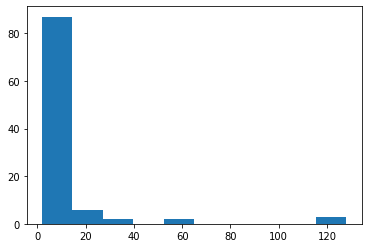

In [56]:
plt.hist(results)

In [3]:
np.random.choice(2,10)

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [5]:
## Part (ii)

max_val = 0
all_cash = 0

for i in range(10000):
    cash = 1
    
    while True:
        roll = np.random.choice(2)
        if roll == 1:
            cash *= 2
        else:
            cash *= 2
            break
    
    all_cash += cash
    if cash > max_val:
        max_val = cash

print("Average money won: ${}".format(all_cash/10000))
print("Maximum money won: ${}".format(max_val))

Average money won: $42.423
Maximum money won: $262144


In [8]:
## Part (iii)

max_val = 0
all_cash = 0

for i in range(1000000):
    if i % 100000 == 0:
        print("Iteration {}".format(i))
    cash = 1
    
    while True:
        roll = np.random.choice(2)
        if roll == 1:
            cash *= 2
        else:
            cash *= 2
            break
    
    all_cash += cash
    if cash > max_val:
        max_val = cash

print("Average money won: ${}".format(all_cash/1000000))
print("Maximum money won: ${}".format(max_val))

Iteration 0
Iteration 100000
Iteration 200000
Iteration 300000
Iteration 400000
Iteration 500000
Iteration 600000
Iteration 700000
Iteration 800000
Iteration 900000
Average money won: $21.472556
Maximum money won: $1048576


## Problem 2: Monty Hall Problem

In [43]:
stay = []
stay_probs = []
switch = []
switch_probs = []

for i in range(1000):
    ## Initialize results, get car and choice
    results = [0,1,2]
    car = np.random.choice(3)
    choice = np.random.choice(3)
    
    ## Remove car and choice picks then get goat pick
    results.remove(car)
    try:
        results.remove(choice)
    except ValueError:
        pass
    
    goat = np.random.choice(results)
    
    ## Remove goat pick from potential
    final_results = [0,1,2]
    final_results.remove(goat)
    
    ## Record results for staying and switching
    if choice == car:
        stay.append(1)
        stay_probs.append(np.mean(stay))
        switch.append(0)
        switch_probs.append(np.mean(switch))
    else:
        stay.append(0)
        stay_probs.append(np.mean(stay))
        switch.append(1)
        switch_probs.append(np.mean(switch))

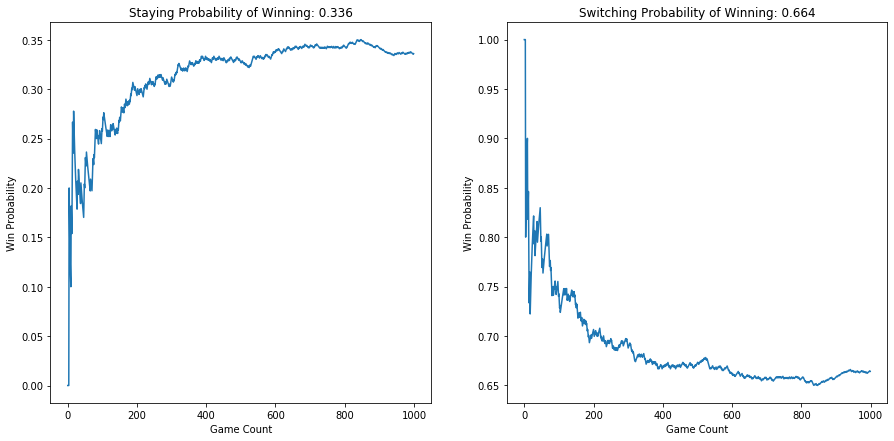

In [44]:
plt.figure(figsize=[15,7])
plt.subplot(121)
plt.title("Staying Probability of Winning: {}".format(stay_probs[-1]))
plt.plot(stay_probs)
plt.xlabel('Game Count')
plt.ylabel('Win Probability')

plt.subplot(122)
plt.title("Switching Probability of Winning: {}".format(switch_probs[-1]))
plt.plot(switch_probs)
plt.xlabel('Game Count')
plt.ylabel('Win Probability')
plt.show()

## Problem 3: Risk Battles

In [46]:
np.random.choice(6,1)

array([4])

In [74]:
n_a = [1,2,3]
n_d = [1,2]
dict_results = {}
final_results = {}

for a in n_a:
    for d in n_d:
        dict_results[tuple((a,d))] = []
        final_results[tuple((a,d))] = []
        print("\nDice Combination: {}".format([a,d]))
        
        for i in range(1000):
            new_a, new_d = a, d
            while new_a > 0 and new_d > 0:
                attack = np.sort(np.random.choice(6,new_a))
                defend = np.sort(np.random.choice(6,new_d))

                num_dice = min(len(attack),len(defend))
#                 print(num_dice)

                for j in range(num_dice):
                    if attack[j] <= defend[j]:
                        new_a -= 1
                    else:
                        new_d -= 1
#                 print(new_a)
#                 print(new_d)
                        
            
            if new_a == 0:
                if new_d == 2:
                    results = -1
                else:
                    results = 0
            else:
                results = 1
            dict_results[tuple((a,d))].append(results)
        
#         print(dict_results[tuple((a,d))])
        print("Outcome Percentages:".format(dict_results[tuple((a,d))]))
        arr = np.asarray(dict_results[tuple((a,d))])
        final_results[tuple((a,d))].append(np.sum(arr == 1)/len(arr))
        final_results[tuple((a,d))].append(np.sum(arr == -1)/len(arr))
        final_results[tuple((a,d))].append(np.sum(arr == 1)/len(arr))
        print("Attacker Wins: {}%".format(100*np.sum(arr == 1)/len(arr)))
        print("Defender Wins: {}%".format(100*np.sum(arr == -1)/len(arr)))
        print("Draw: {}%".format(100*np.sum(arr == 0)/len(arr)))


Dice Combination: [1, 1]
Outcome Percentages:
Attacker Wins: 40.3%
Defender Wins: 0.0%
Draw: 59.7%

Dice Combination: [1, 2]
Outcome Percentages:
Attacker Wins: 24.3%
Defender Wins: 42.0%
Draw: 33.7%

Dice Combination: [2, 1]
Outcome Percentages:
Attacker Wins: 58.1%
Defender Wins: 0.0%
Draw: 41.9%

Dice Combination: [2, 2]
Outcome Percentages:
Attacker Wins: 36.5%
Defender Wins: 45.8%
Draw: 17.7%

Dice Combination: [3, 1]
Outcome Percentages:
Attacker Wins: 64.7%
Defender Wins: 0.0%
Draw: 35.3%

Dice Combination: [3, 2]
Outcome Percentages:
Attacker Wins: 40.9%
Defender Wins: 26.5%
Draw: 32.6%


In [89]:
n_a = np.arange(1,20)
n_d = [5]
dict_results = {}
final_results = {}

for a in n_a:
    for d in n_d:
        dict_results[tuple((a,d))] = []
        final_results[tuple((a,d))] = []
        print("\nDice Combination: {}".format([a,d]))
        
        for i in range(1000):
            new_a, new_d = a, d
            while new_a > 0 and new_d > 0:
                if new_a > 3:
                    a_dice = 3
                else:
                    a_dice = new_a
                attack = np.sort(np.random.choice(6,a_dice))
                
                if new_d > 2:
                    d_dice = 2
                else:
                    d_dice = new_d
                
                defend = np.sort(np.random.choice(6,d_dice))

                num_dice = min(len(attack),len(defend))

                for j in range(num_dice):
                    if attack[j] <= defend[j]:
                        new_a -= 1
                    else:
                        new_d -= 1
            
            if new_a == 0:
                if new_d > 1:
                    results = -1
                else:
                    results = 0
            else:
                results = 1
            dict_results[tuple((a,d))].append(results)
        

        print("Outcome Percentages:".format(dict_results[tuple((a,d))]))
        arr = np.asarray(dict_results[tuple((a,d))])
        final_results[tuple((a,d))].append(np.sum(arr == 0)/len(arr))
        final_results[tuple((a,d))].append(np.sum(arr == -1)/len(arr))
        final_results[tuple((a,d))].append(np.sum(arr == 1)/len(arr))
        print("Attacker Wins: {}%".format(100*np.sum(arr == 1)/len(arr)))
        print("Defender Wins: {}%".format(100*np.sum(arr == -1)/len(arr)))
        print("Draw: {}%".format(100*np.sum(arr == 0)/len(arr)))


Dice Combination: [1, 5]
Outcome Percentages:
Attacker Wins: 4.8%
Defender Wins: 89.8%
Draw: 5.4%

Dice Combination: [2, 5]
Outcome Percentages:
Attacker Wins: 6.6%
Defender Wins: 85.3%
Draw: 8.1%

Dice Combination: [3, 5]
Outcome Percentages:
Attacker Wins: 8.6%
Defender Wins: 81.3%
Draw: 10.1%

Dice Combination: [4, 5]
Outcome Percentages:
Attacker Wins: 11.3%
Defender Wins: 76.2%
Draw: 12.5%

Dice Combination: [5, 5]
Outcome Percentages:
Attacker Wins: 17.0%
Defender Wins: 70.9%
Draw: 12.1%

Dice Combination: [6, 5]
Outcome Percentages:
Attacker Wins: 19.5%
Defender Wins: 65.8%
Draw: 14.7%

Dice Combination: [7, 5]
Outcome Percentages:
Attacker Wins: 22.2%
Defender Wins: 62.1%
Draw: 15.7%

Dice Combination: [8, 5]
Outcome Percentages:
Attacker Wins: 29.0%
Defender Wins: 53.2%
Draw: 17.8%

Dice Combination: [9, 5]
Outcome Percentages:
Attacker Wins: 35.9%
Defender Wins: 49.1%
Draw: 15.0%

Dice Combination: [10, 5]
Outcome Percentages:
Attacker Wins: 36.2%
Defender Wins: 44.0%
Draw: 

In [90]:
vals = []
key_list = [tuple((a,5)) for a in n_a]
for key in key_list:
    vals.append(final_results[key][2])

In [91]:
vals

[0.048,
 0.066,
 0.086,
 0.113,
 0.17,
 0.195,
 0.222,
 0.29,
 0.359,
 0.362,
 0.426,
 0.453,
 0.533,
 0.547,
 0.573,
 0.661,
 0.682,
 0.7,
 0.725]

Text(0, 0.5, 'Probability of Winning')

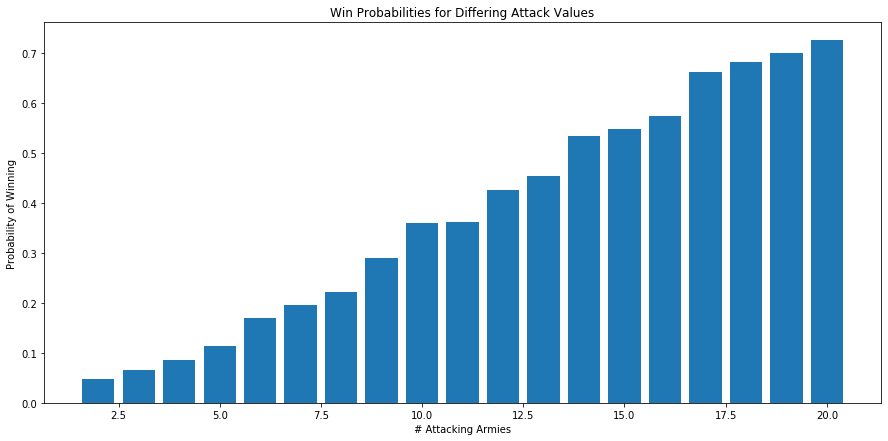

In [92]:
plt.figure(figsize=[15,7])
plt.title('Win Probabilities for Differing Attack Values')
plt.bar(np.arange(2,21),vals)
plt.xlabel('# Attacking Armies')
plt.ylabel('Probability of Winning')

In [94]:
scores = np.zeros((10,10))

total_runs = 10000

n_a = [9]
n_d = [10]
dict_results = {}
final_results = {}

for a in n_a:
    for d in n_d:
        dict_results[tuple((a,d))] = []
        final_results[tuple((a,d))] = []
        print("\nDice Combination: {}".format([a,d]))
        
        for i in range(total_runs):
            new_a, new_d = a, d
            while new_a > 0 and new_d > 0:
                if new_a > 3:
                    a_dice = 3
                else:
                    a_dice = new_a
                attack = np.sort(np.random.choice(6,a_dice))
                
                if new_d > 2:
                    d_dice = 2
                else:
                    d_dice = new_d
                
                defend = np.sort(np.random.choice(6,d_dice))

                num_dice = min(len(attack),len(defend))

                for j in range(num_dice):
                    if attack[j] <= defend[j]:
                        new_a -= 1
                    else:
                        new_d -= 1
            
            scores[new_a,max(int(new_d)-1,0)] += 1


Dice Combination: [9, 10]


Text(0, 0.5, 'Attacker Armies')

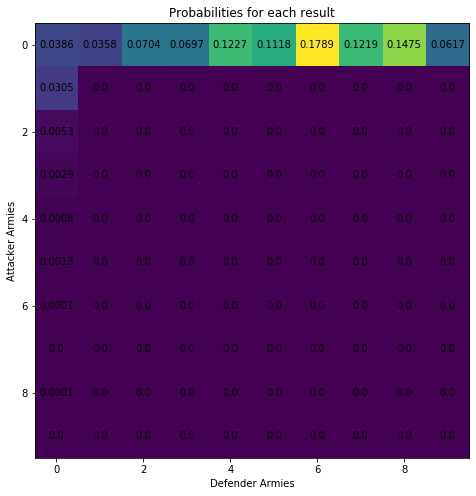

In [102]:
fig = plt.figure(figsize=[8,8])
scores /= 10000
ax = fig.add_subplot(111)
ax.imshow(scores, cmap='viridis')

for (j,i),label in np.ndenumerate(scores):
    ax.text(i,j,label,ha='center',va='center')

plt.title('Probabilities for each result')
plt.xlabel('Defender Armies')
plt.ylabel('Attacker Armies')